In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from IPython import display
import graphviz


In [31]:
#Load Dataset
data = pd.read_csv('ParticipantsData.csv')

# Clean the data
sex_encoder = LabelEncoder()
data['Sex'] = sex_encoder.fit_transform(data['Sex'])

tug_risk_encoder = LabelEncoder()
data['TUG_Risk'] = tug_risk_encoder.fit_transform(data['TUG_Risk'])

data.to_csv('cleaned_ParticipantsData.csv', index=False)

In [32]:
# Multiple Linear Regression

data = pd.read_csv('cleaned_ParticipantsData.csv')

X = data[['Smoking_Behavior', 'UD_HighBloodPress', 'UD_HighCholesterol',
          'UD_Diabetes', 'UD_MuscleWeakness', 'UD_Stroke', 'UD_HeartDisease']]
y = data['TUG_Risk']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TUG_Risk   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                 -0.074
Method:                 Least Squares   F-statistic:                    0.6214
Date:                Wed, 24 Apr 2024   Prob (F-statistic):              0.711
Time:                        15:42:14   Log-Likelihood:                -22.241
No. Observations:                  34   AIC:                             58.48
Df Residuals:                      27   BIC:                             69.17
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4974      0

In [33]:
# Naive Bayes
nb_classifier = GaussianNB()

# Use Leave-One-Out Cross-Validation
leave_one_out = LeaveOneOut()

accuracies = []

for train_index, test_index in leave_one_out.split(X):
    # Separate data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Implement Naive Bayes classifier on training data
    nb_classifier.fit(X_train, y_train)
    y_pred = nb_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

average_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy in Predicting TUG Risk:", average_accuracy)

Average Accuracy in Predicting TUG Risk: 0.5882352941176471


Average Accuracy in Predicting TUG Risk using a Decision Tree: 0.5882352941176471


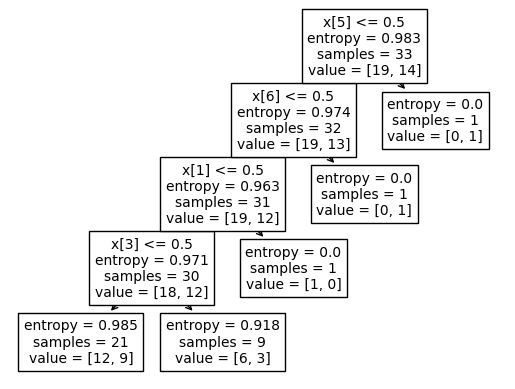

In [34]:
# Use Leave-One-Out Cross-Validation
leave_one_out = LeaveOneOut()

accuracies = []

for train_index, test_index in leave_one_out.split(X):
    # Separate data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Create Decision Tree Classifier
    dtc = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=4)

    #Train Decision Tree and plot
    dtc = dtc.fit(X_train, y_train)
    tree.plot_tree(dtc)

    #Predict values for test data
    y_pred = dtc.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

#Print out information about the accuracy
average_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy in Predicting TUG Risk using a Decision Tree:", average_accuracy)


In [36]:
# Use Leave-One-Out Cross-Validation
leave_one_out = LeaveOneOut()

accuracies = []

for train_index, test_index in leave_one_out.split(X):
    # Separate data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Create Random Forest Classifier
    rfc = RandomForestClassifier(max_depth=3)

    #Train Random Forest Tree
    rfc = rfc.fit(X_train, y_train)

    #Predict values for test data
    y_pred = rfc.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

#Print out information about the accuracy
average_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy in Predicting TUG Risk using a Random Forest:", average_accuracy)


Average Accuracy in Predicting TUG Risk using a Random Forest: 0.29411764705882354
